## Predicting House Prices

> #### Task
- The task is to predict house prices based on various features like the size of the house, number of bedrooms, and location, using a machine learning algorithm


> #### Objectives

 - Understand how machine learning algorithms can be applied to predict continuous values (regression problem)
 - Implement a Linear Regression model to predict house prices
- Evaluate the model's performance using evaluation metrics such as Mean Absolute Error, Mean Squared Error, and R squared (R²)

In [ ]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
import joblib

In [29]:
# loading the dataset
df = pd.read_csv("../Data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
print(f'we have {df.shape[0]} number of records and {df.shape[1]} number of features')

we have 1460 number of records and 81 number of features


In [31]:
#checking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [32]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

#### Data Preprocessing

In [33]:
selected_features = [
    "OverallQual",
    "GrLivArea",
    "TotalBsmtSF",
    "GarageCars",
    "BedroomAbvGr",
    "FullBath",
    "YearBuilt",
    "Neighborhood",
    "SalePrice"
]

df = df[selected_features]
df.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,BedroomAbvGr,FullBath,YearBuilt,Neighborhood,SalePrice
0,7,1710,856,2,3,2,2003,CollgCr,208500
1,6,1262,1262,2,3,2,1976,Veenker,181500
2,7,1786,920,2,3,2,2001,CollgCr,223500
3,7,1717,756,3,3,1,1915,Crawfor,140000
4,8,2198,1145,3,4,2,2000,NoRidge,250000


In [34]:
#checking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1460 non-null   int64 
 1   GrLivArea     1460 non-null   int64 
 2   TotalBsmtSF   1460 non-null   int64 
 3   GarageCars    1460 non-null   int64 
 4   BedroomAbvGr  1460 non-null   int64 
 5   FullBath      1460 non-null   int64 
 6   YearBuilt     1460 non-null   int64 
 7   Neighborhood  1460 non-null   object
 8   SalePrice     1460 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 102.8+ KB


In [35]:
df.Neighborhood.value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [36]:
df = pd.get_dummies(df, columns=["Neighborhood"], drop_first=True)

In [37]:
df.columns

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'BedroomAbvGr',
       'FullBath', 'YearBuilt', 'SalePrice', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker'],
      dtype='object')

In [40]:
scaler = StandardScaler()
numerical_features = [
    "OverallQual",
    "GrLivArea",
    "TotalBsmtSF",
    "GarageCars",
    "BedroomAbvGr",
    "FullBath",
    "YearBuilt"
]
scaler.fit(df[numerical_features])
df[numerical_features] = scaler.transform(df[numerical_features])
df.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,BedroomAbvGr,FullBath,YearBuilt,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0.651479,0.370333,-0.459303,0.311725,0.163779,0.789741,1.050994,208500,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.071836,-0.482512,0.466465,0.311725,0.163779,0.789741,0.156734,181500,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0.651479,0.515013,-0.313369,0.311725,0.163779,0.789741,0.984752,223500,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.651479,0.383659,-0.687324,1.650307,0.163779,-1.026041,-1.863632,140000,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.374795,1.299326,0.199680,1.650307,1.390023,0.789741,0.951632,250000,False,False,...,True,False,False,False,False,False,False,False,False,False


In [41]:
# Split the data into features (X) and target variable (y)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

#### Split the Dataset into Training and Testing Sets

In [42]:
# Use an 80 - 20 train test split
X_train, X_test , y_train , y_test = train_test_split (X, y, test_size =0.2, random_state =42)

#### Train the Linear Regression Model

In [44]:
# Initialize the Linear Regression model
model = LinearRegression()

In [45]:
# Fit the model to the training data
model.fit(X_train , y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


#### Making predictions with the linear Regression model

In [46]:
# Predict on the test set
y_pred = model.predict(X_test)

#### Evaluating the linear Regression model

In [47]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test , y_pred)
mse= mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)

In [48]:
# Print the evaluation results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R squared (R²): {r2}')

Mean Absolute Error (MAE): 22265.273424266758
Mean Squared Error (MSE): 1301513686.9952564
R squared (R²): 0.8303183395543552


#### VISUALIZE THE RESULTS

<function matplotlib.pyplot.show(close=None, block=None)>

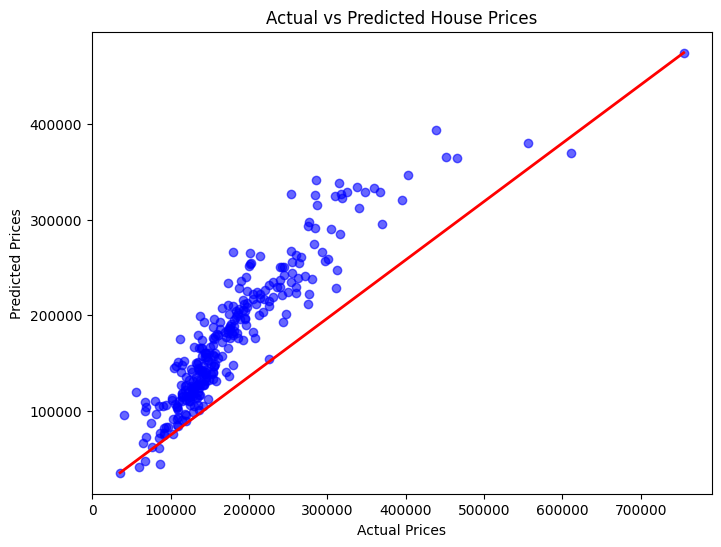

In [49]:
# Plot actual vs predicted house prices
plt.figure(figsize =(8, 6))
plt.scatter(y_test , y_pred , alpha=0.6, color ='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color ='red', linewidth=2)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show

#### Using another regression model: Random Forest Regressor

##### Train the Random Forest Regression Model

In [50]:
#Initialize the Random Forest Regressor
model =RandomForestRegressor(random_state =42)

In [51]:
# Fit the model to the training data
model.fit(X_train , y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [52]:
#### Making predictions with the Random Forest Regressor model
# Predict on the test set
y_pred = model.predict(X_test)

In [53]:
#### Evaluating the Random Forest Regressor model
mae = mean_absolute_error(y_test , y_pred)
mse= mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)

# Print the evaluation results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R squared (R²): {r2}')

Mean Absolute Error (MAE): 18157.390086431835
Mean Squared Error (MSE): 782456450.1395574
R squared (R²): 0.8979891560014237


<function matplotlib.pyplot.show(close=None, block=None)>

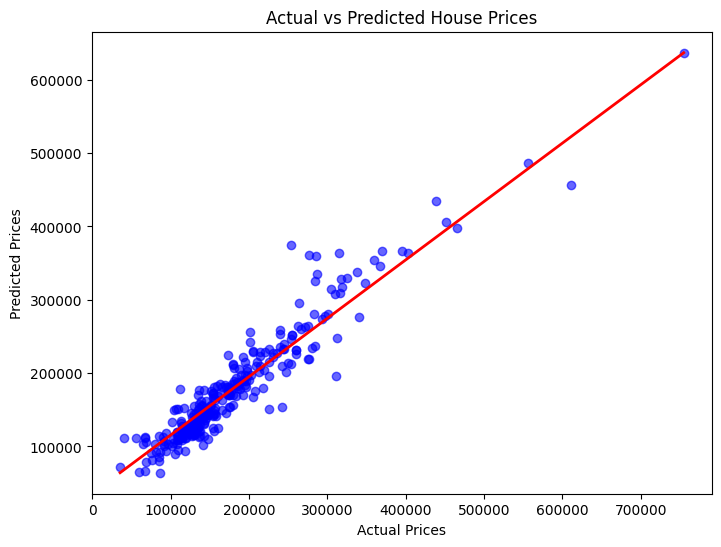

In [55]:
# Plot actual vs predicted house prices
plt.figure(figsize =(8, 6))
plt.scatter(y_test , y_pred , alpha=0.6, color ='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color ='red', linewidth=2)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show

In [ ]:
#Then export the random forest model
joblib.dump(model, r'model/random_forest_model.joblib')
print('Model saved to: model/random_forest_model.joblib')